<a href="https://colab.research.google.com/github/vinicius-mattoso/Maintenance_study/blob/main/Previs%C3%A3o_Anomalias_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import os
import pandas as pd

CSV_PATH = None  # opcional: '/caminho/para/sensor.csv'

def load_dataset(csv_path=None):
    if csv_path is not None and os.path.exists(csv_path):
        return pd.read_csv(csv_path)
    try:
        import kagglehub
        path = kagglehub.dataset_download("nphantawee/pump-sensor-data")
        candidate = os.path.join(path, "sensor.csv")
        if os.path.exists(candidate):
            return pd.read_csv(candidate)
        # fallback: usa o primeiro .csv existente
        for f in os.listdir(path):
            if f.lower().endswith('.csv'):
                return pd.read_csv(os.path.join(path, f))
        raise FileNotFoundError("CSV não encontrado dentro do dataset baixado.")
    except Exception as e:
        raise RuntimeError("Falha ao localizar CSV. Defina CSV_PATH ou configure acesso ao Kaggle.") from e

df = load_dataset(CSV_PATH)
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### EDA

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

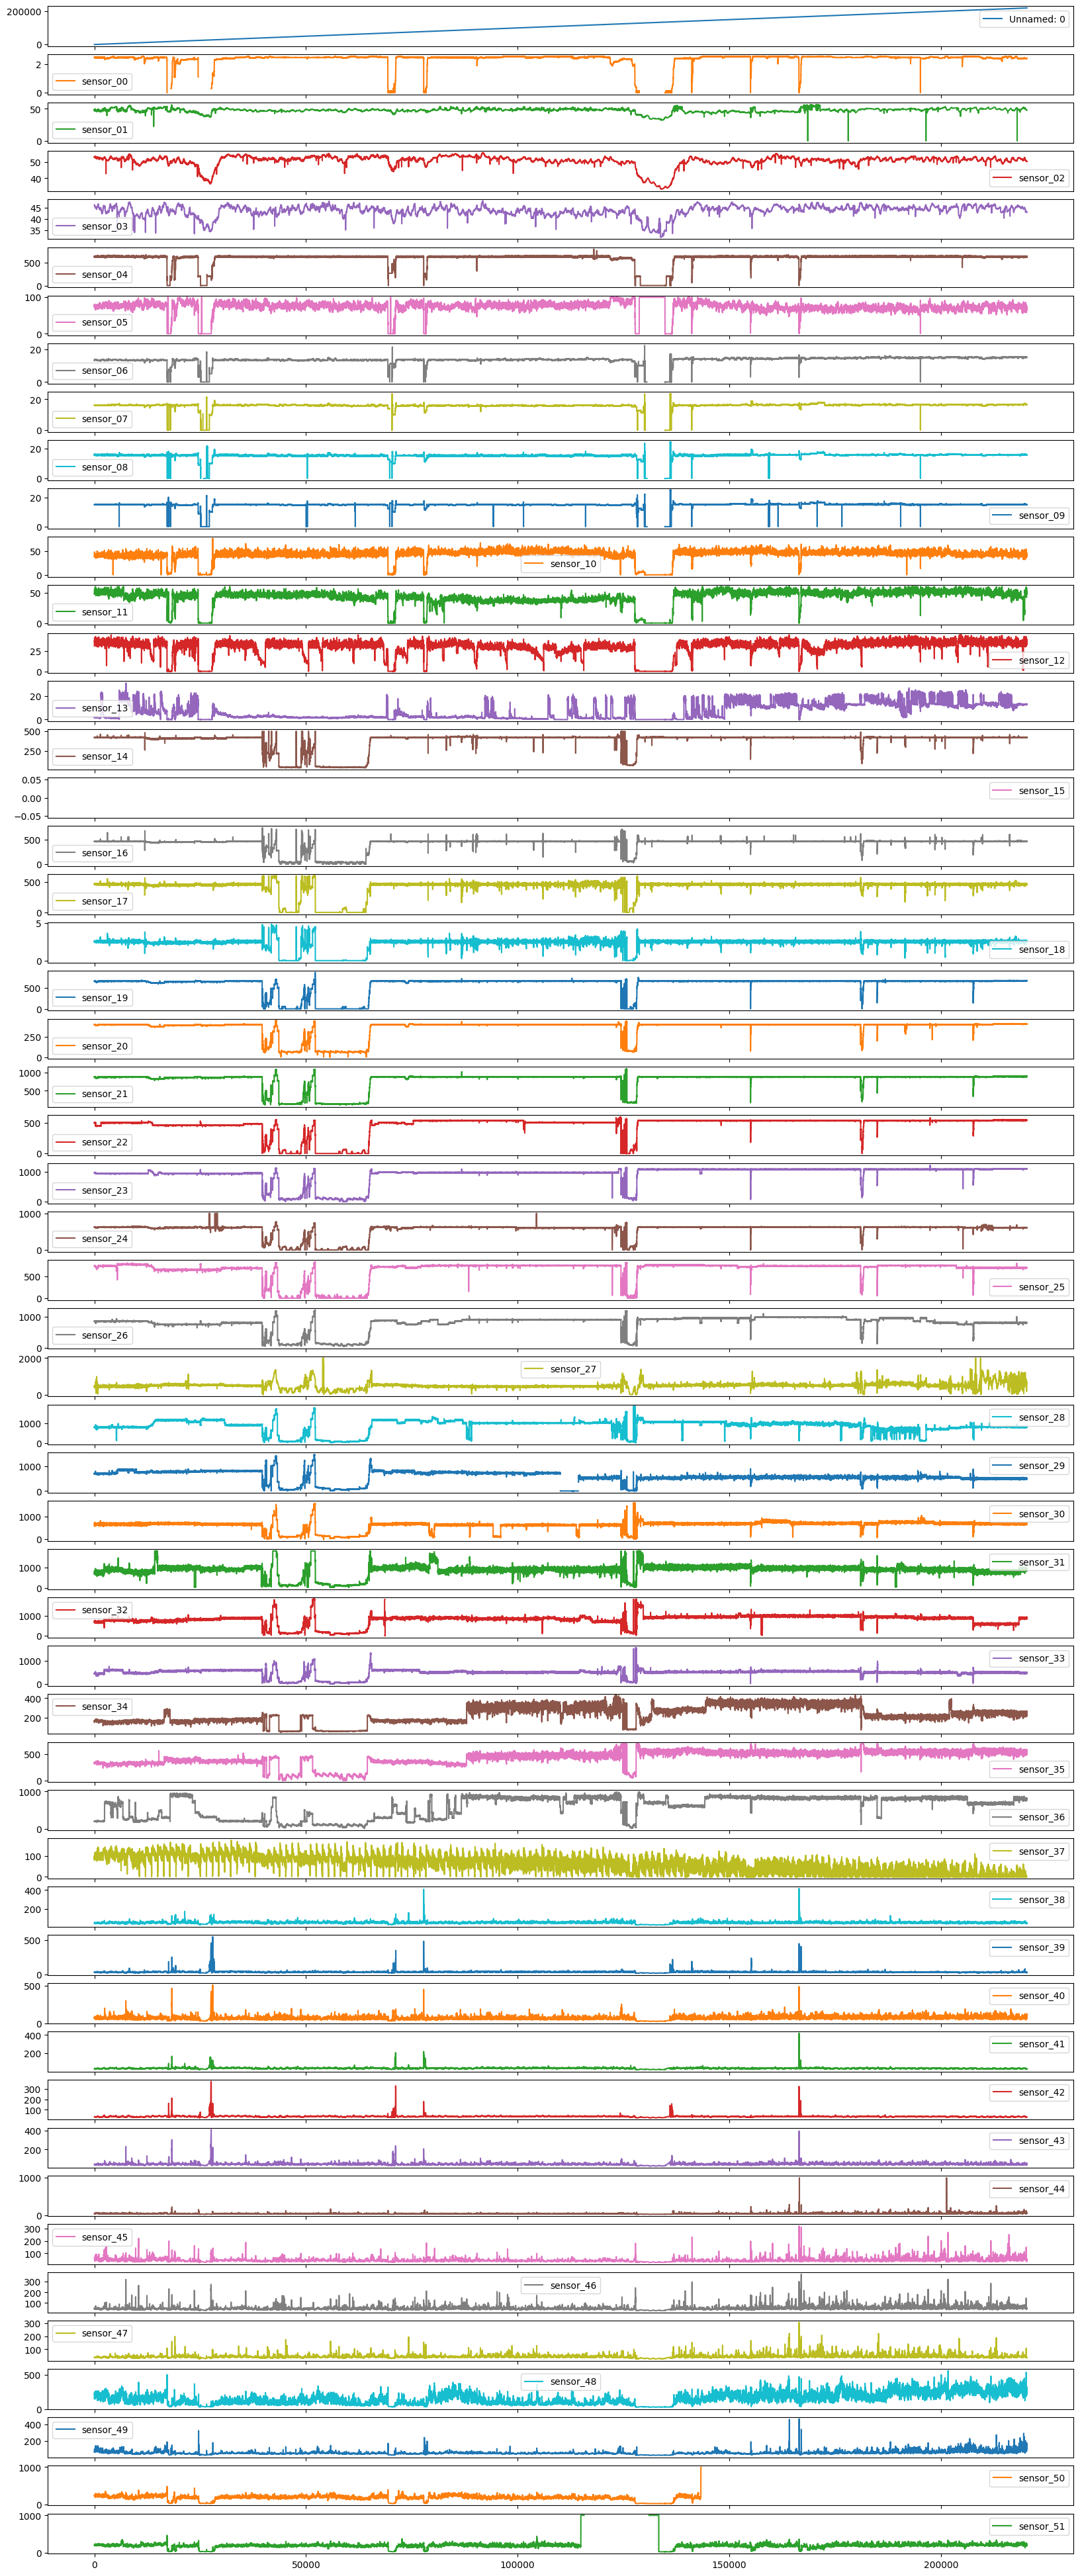

In [31]:
df.plot(subplots =True, sharex = True, figsize = (20,50))

### Podemos perceber que há uma certa similaridade na informação que cada sensor esta obtendo.

* (1,2,3)

* (4, 5, 6, 7, 8, 9, 10, 11, 12, 13)

* (14 - 36)

* (37 - 51)

In [81]:
df.to_csv('data_original.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [33]:
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [34]:
from __future__ import annotations

from typing import Iterable, Union, Optional, Dict, List, Tuple
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_sensors_with_status(
    df: pd.DataFrame,
    ts_col: str = "timestamp",
    label_col: str = "machine_status",
    sensors: Union[str, Iterable[str]] = "sensor_01",
    *,
    figsize: Tuple[int, int] = (12, 5),
    date_format: str = "%Y-%m-%d %H:%M",
    step_status: bool = True,
    status_values: Optional[Iterable] = None,
    status_map: Optional[Dict] = None,
    status_order: Optional[List] = None,
    title: Optional[str] = None,
    show: bool = True,
    status_color: str = "tab:red",
    sensor_color: str = "tab:blue",
    status_linewidth: float = 1.6,
    sensor_linewidth: float = 1.2,
    sensor_alpha: float = 0.9,
):
    # Normaliza parâmetro de sensores
    if isinstance(sensors, str):
        sensors = [sensors]
    else:
        sensors = list(sensors)

    # Garantir datetime no eixo X e ordenar
    if ts_col not in df.columns or label_col not in df.columns:
        missing = [c for c in (ts_col, label_col) if c not in df.columns]
        raise KeyError(f"Colunas ausentes no DataFrame: {missing}")
    if not pd.api.types.is_datetime64_any_dtype(df[ts_col]):
        df = df.copy()
        df[ts_col] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.sort_values(ts_col)

    # Verifica sensores
    missing_sensors = [s for s in sensors if s not in df.columns]
    if missing_sensors:
        raise KeyError(f"Sensores ausentes no DataFrame: {missing_sensors}")

    # Preparar status
    status_series = df[label_col]
    y_tick_positions = None
    y_tick_labels = None

    if status_map is not None:
        mapped = status_series.map(status_map)
        if mapped.isna().any():
            unknown = status_series[mapped.isna()].unique().tolist()
            raise ValueError(f"Valores de status sem mapeamento em status_map: {unknown}")
        status_numeric = mapped.astype(float)
        if status_order is None:
            status_order = list(status_map.keys())
        y_tick_positions = [status_map[k] for k in status_order]
        y_tick_labels = status_order
        status_values = [min(y_tick_positions), max(y_tick_positions)]
    elif pd.api.types.is_numeric_dtype(status_series):
        status_numeric = status_series.astype(float)
        if status_values is None and set(status_series.dropna().unique()).issubset({0, 1}):
            status_values = [0, 1]
    else:
        cats = pd.Categorical(status_series)
        if cats.categories.empty:
            raise ValueError("Coluna de status categórica, mas sem categorias definidas.")
        if status_order is None:
            status_order = list(cats.categories)
        auto_map = {cat: i for i, cat in enumerate(status_order)}
        status_numeric = status_series.map(auto_map).astype(float)
        y_tick_positions = list(auto_map.values())
        y_tick_labels = status_order
        status_values = [min(y_tick_positions), max(y_tick_positions)]

    plot_df = df[[ts_col]].copy()
    plot_df["_status_num_"] = status_numeric

    for sensor in sensors:
        fig, ax1 = plt.subplots(figsize=figsize)

        # Eixo X
        ax1.set_xlabel(ts_col)
        ax1.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
        fig.autofmt_xdate()

        # Eixo Y esquerdo = sensor
        ax1.set_ylabel(sensor, color=sensor_color)
        l1, = ax1.plot(
            df[ts_col],
            df[sensor],
            color=sensor_color,
            linewidth=sensor_linewidth,
            alpha=sensor_alpha,
            label=sensor,
        )
        ax1.tick_params(axis="y", labelcolor=sensor_color)

        # Eixo Y direito = status
        ax2 = ax1.twinx()
        ax2.set_ylabel(label_col, color=status_color)
        if step_status:
            l2, = ax2.step(
                plot_df[ts_col],
                plot_df["_status_num_"],
                where="post",
                color=status_color,
                linewidth=status_linewidth,
                label=label_col,
            )
        else:
            l2, = ax2.plot(
                plot_df[ts_col],
                plot_df["_status_num_"],
                color=status_color,
                linewidth=status_linewidth,
                label=label_col,
            )
        ax2.tick_params(axis="y", labelcolor=status_color)

        if status_values is not None:
            try:
                ymin, ymax = float(min(status_values)), float(max(status_values))
                if ymin == ymax:
                    ymin, ymax = ymin - 1, ymax + 1
                ax2.set_ylim(ymin, ymax)
            except Exception:
                pass

        if y_tick_positions is not None and y_tick_labels is not None:
            ax2.set_yticks(y_tick_positions)
            ax2.set_yticklabels(y_tick_labels)

        ttl = title or f"{sensor} vs {label_col}"
        ax1.set_title(ttl)
        ax1.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

        fig.tight_layout()
        if show:
            plt.show()

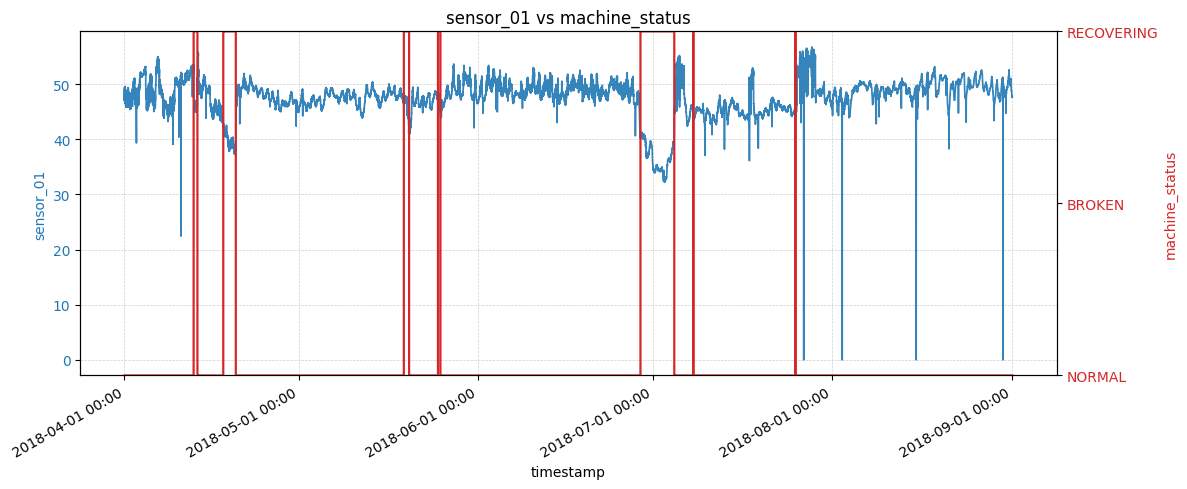

In [35]:
    plot_sensors_with_status(
        df,
        ts_col="timestamp",
        label_col="machine_status",
        sensors="sensor_01",
        status_map={"NORMAL": 0, "BROKEN": 1, "RECOVERING": 2},
        step_status=True,
        status_color="tab:red",
        sensor_color="tab:blue",
    )

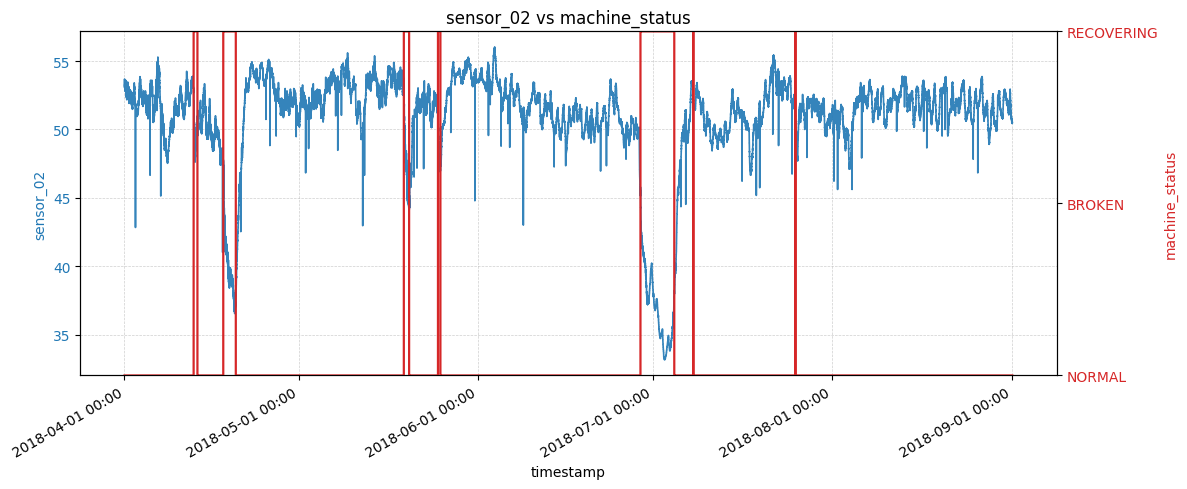

In [36]:
    plot_sensors_with_status(
        df,
        ts_col="timestamp",
        label_col="machine_status",
        sensors="sensor_02",
        status_map={"NORMAL": 0, "BROKEN": 1, "RECOVERING": 2},
        step_status=True,
        status_color="tab:red",
        sensor_color="tab:blue",
    )

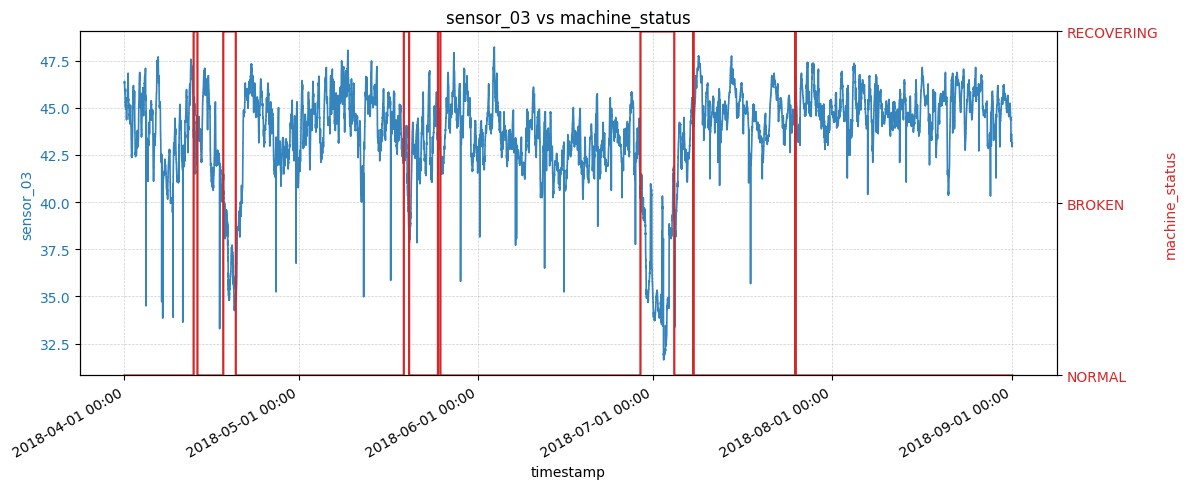

In [37]:
    plot_sensors_with_status(
        df,
        ts_col="timestamp",
        label_col="machine_status",
        sensors="sensor_03",
        status_map={"NORMAL": 0, "BROKEN": 1, "RECOVERING": 2},
        step_status=True,
        status_color="tab:red",
        sensor_color="tab:blue",
    )

### Modelagem do Problema

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# -----------------------
# Parâmetros
# -----------------------
WIN = 60  # nº de pontos por janela (ajuste conforme sampling rate / horizonte de detecção)

SENSORS = ['sensor_01', 'sensor_02', 'sensor_03']

# -----------------------
# 1) Preparação base + target binário
# -----------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)
df['target'] = (df['machine_status'] != 'NORMAL').astype(int)

# Mantém apenas colunas necessárias
cols = ['timestamp', 'target'] + SENSORS
df = df[cols].dropna().reset_index(drop=True)

### Etapa de Extração de Atributos

* Feature Engineering

* Moving Window

* Label window



In [39]:
# -----------------------
# 2) Janelas deslizantes (stride=1) + features por janela
#    mean, std, min, max por sensor
# -----------------------
feat_df = pd.DataFrame(index=df.index)

for s in SENSORS:
    r = df[s].rolling(window=WIN, min_periods=WIN)
    feat_df[f'{s}_mean_{WIN}'] = r.mean()
    feat_df[f'{s}_std_{WIN}']  = r.std()
    feat_df[f'{s}_min_{WIN}']  = r.min()
    feat_df[f'{s}_max_{WIN}']  = r.max()

# Rótulo da janela: 1 se houve qualquer irregularidade DENTRO da janela
feat_df['y_window'] = df['target'].rolling(window=WIN, min_periods=WIN).max()

# Metadados da janela (opcional: ajuda no debug e auditoria)
feat_df['window_end']   = df['timestamp']
feat_df['window_start'] = df['timestamp'].shift(WIN-1)

# Remove as linhas iniciais sem janela completa
feat_df = feat_df.dropna().reset_index(drop=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

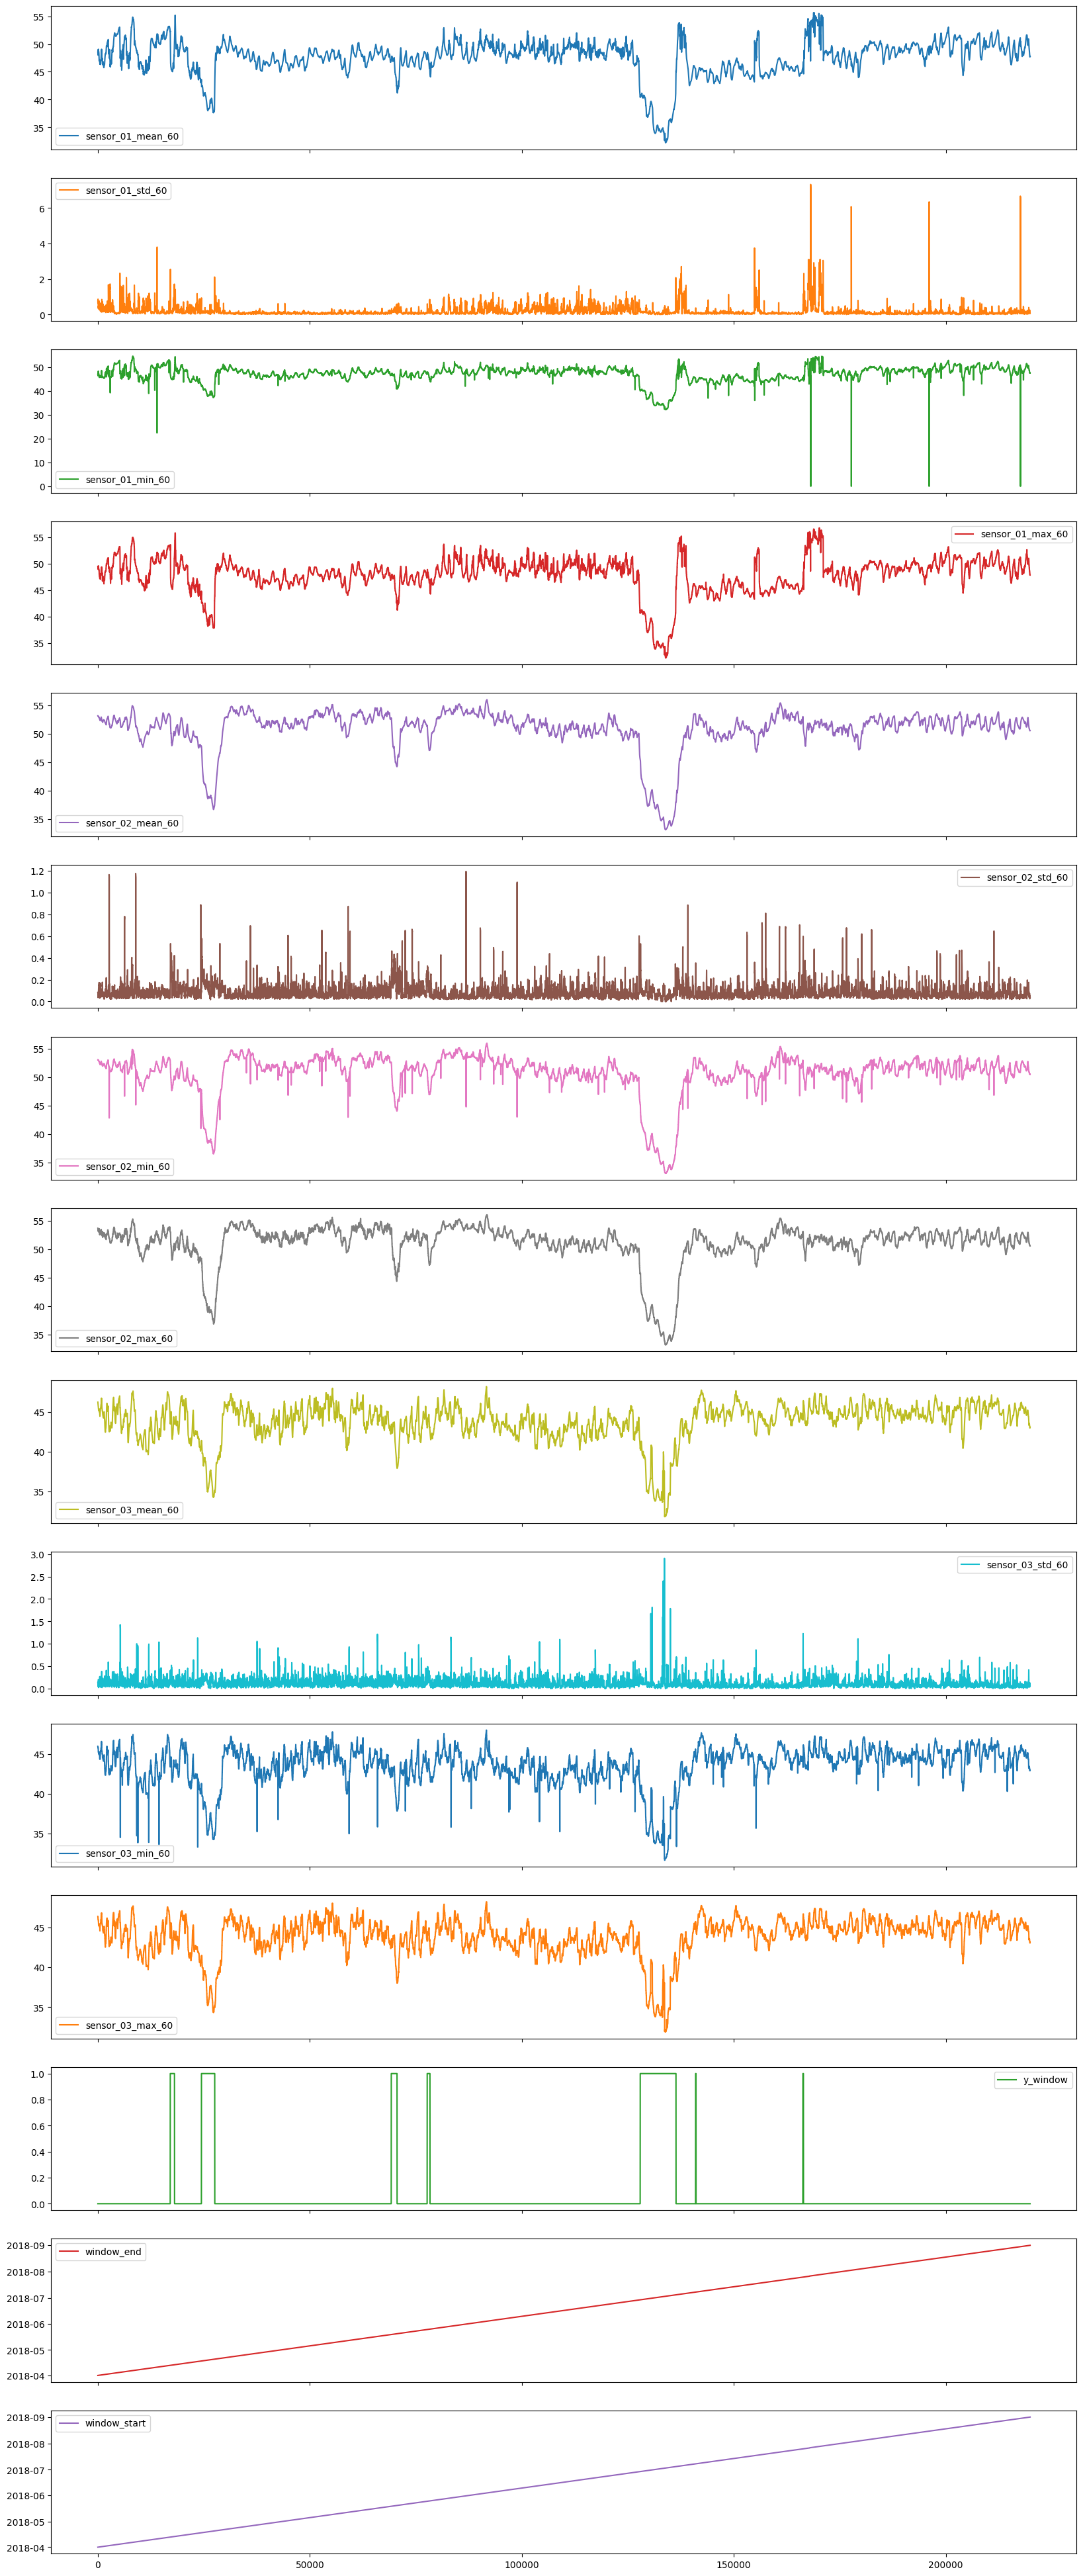

In [40]:
feat_df.plot(subplots =True, sharex = True, figsize = (20,50))

# Split the dataset

* estratified

In [41]:
# -----------------------
# 3) Split (estratificado) — uso exploratório
#    Obs.: quebra a ordem temporal por design, apenas para diagnosticar o modelo.
# -----------------------
X = feat_df[[c for c in feat_df.columns if any(k in c for k in ['_mean_', '_std_', '_min_', '_max_'])]]
y = feat_df['y_window'].astype(int)

print(f"Distribuição pós-janelas — Normal={len(y)-y.sum()}, Irregular={int(y.sum())} ({y.mean():.2%} positivos)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42, shuffle=True
)

Distribuição pós-janelas — Normal=205025, Irregular=14867 (6.76% positivos)


# Training

* data normalization

* Random Forest Classifier

In [42]:
# -----------------------
# 4) Escalonamento + Modelo
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

### Metrics

In [43]:
# -----------------------
# 5) Inferência e métricas
# -----------------------
y_score = clf.predict_proba(X_test_scaled)[:, 1]
threshold = 0.5
y_pred = (y_score >= threshold).astype(int)

print("\nClassification Report (threshold=0.5)")
print(classification_report(
    y_test, y_pred,
    labels=[0,1],
    target_names=['Normal','Irregular'],
    zero_division=0
))
print("Confusion Matrix [TN FP; FN TP]:")
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


Classification Report (threshold=0.5)
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     41006
   Irregular       1.00      1.00      1.00      2973

    accuracy                           1.00     43979
   macro avg       1.00      1.00      1.00     43979
weighted avg       1.00      1.00      1.00     43979

Confusion Matrix [TN FP; FN TP]:
[[41006     0]
 [    3  2970]]


In [44]:
try:
    roc = roc_auc_score(y_test, y_score)
except ValueError:
    roc = np.nan
try:
    pr_auc = average_precision_score(y_test, y_score)
except ValueError:
    pr_auc = np.nan

print(f"ROC AUC: {roc if not np.isnan(roc) else 'NA'}")
print(f"PR AUC (classe positiva=Irregular): {pr_auc if not np.isnan(pr_auc) else 'NA'}")

# (Opcional) anexo timestamps para auditoria do conjunto de teste
test_index = y_test.index
audit_test = feat_df.loc[test_index, ['window_start','window_end']].copy()

ROC AUC: 0.9999999097701223
PR AUC (classe positiva=Irregular): 0.9999987600648914


### Análise do resultado

In [59]:
def plot_prediction_window(df_full, feat_df, idx, win=60):
    """
    idx: índice da linha no feat_df (após criação das features)
    win: tamanho da janela
    """
    start_time = feat_df.loc[idx, 'window_start']
    end_time   = feat_df.loc[idx, 'window_end']

    mask = (df_full['timestamp'] >= start_time) & (df_full['timestamp'] <= end_time)
    window_data = df_full.loc[mask]

    plt.figure(figsize=(12,6))
    for s in SENSORS:
        plt.plot(window_data['timestamp'], window_data[s], label=s)
    plt.axhline(y=window_data[SENSORS].mean().mean(), color='gray', linestyle='--', alpha=0.5)

    label = feat_df.loc[idx, 'y_window']

    plt.title(f"Janela {start_time} → {end_time} | Label: {'Irregular' if label==1 else 'Normal'}")
    plt.xlabel("Timestamp")
    plt.ylabel("Leitura do sensor")
    plt.legend()
    plt.show()

In [60]:
df_full = df[['timestamp', 'target'] + SENSORS].copy()

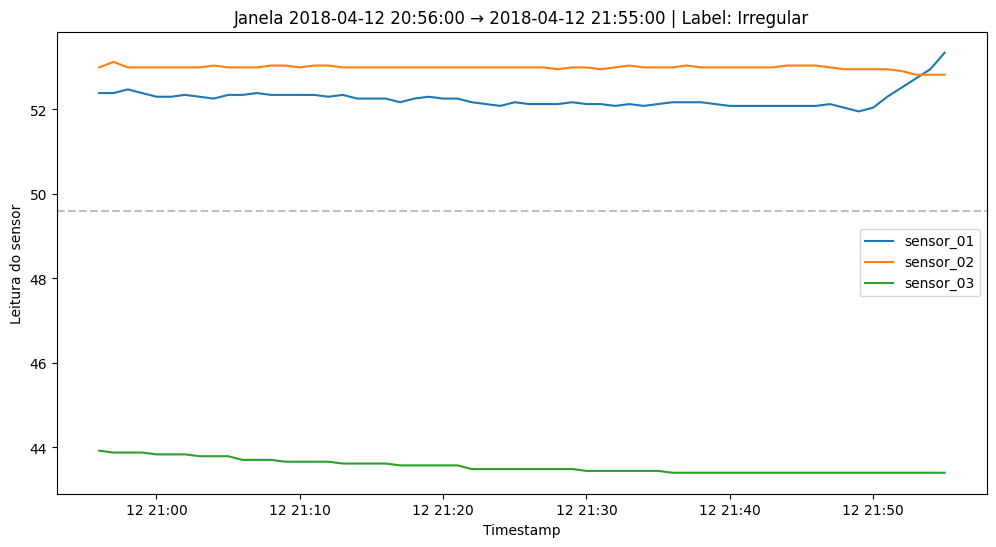

In [61]:
idx = feat_df[feat_df['y_window'] == 1].index[0]
plot_prediction_window(df_full, feat_df, idx, win=WIN)

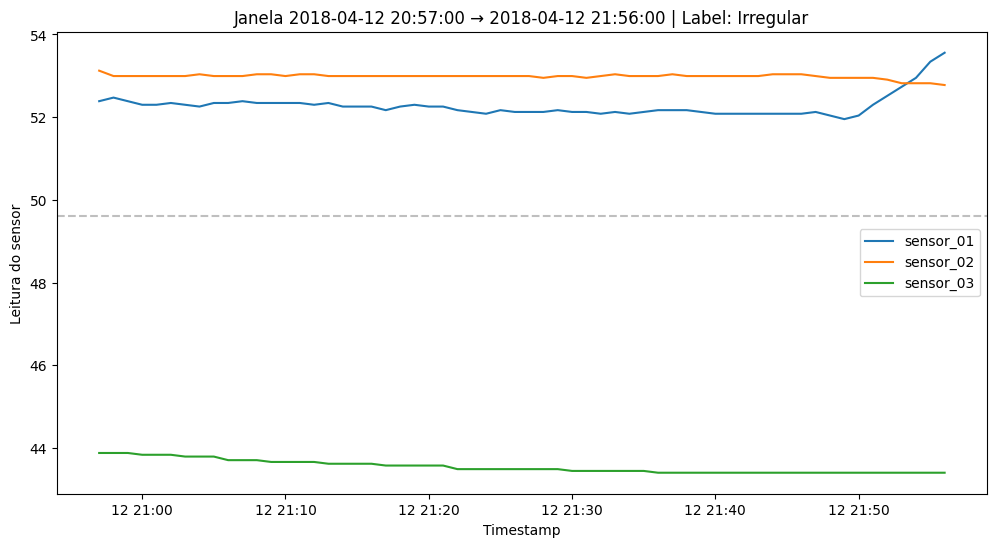

In [51]:
idx = feat_df[feat_df['y_window'] == 1].index[1]
plot_prediction_window(df_full, feat_df, idx, win=WIN)

In [67]:
import pandas as pd
import numpy as np

def confusion_em_horas(y_true, y_score, win_end_ts, threshold=0.5):
    """
    y_true     : pd.Series (0/1) com índice de feat_df (ex.: y_test)
    y_score    : pd.Series (probabilidade da classe 1) alinhada a y_true.index
    win_end_ts : pd.Series de timestamps (feat_df.loc[y_true.index, 'window_end'])
    threshold  : corte para classificar Irregular

    Retorna: dict com horas em TP, FP, TN, FN + métricas
    """
    # Assegura alinhamento
    dfh = pd.DataFrame({
        'y_true': y_true.astype(int),
        'y_score': y_score
    }, index=y_true.index).dropna()
    dfh['y_pred'] = (dfh['y_score'] >= threshold).astype(int)
    dfh['ts'] = pd.to_datetime(win_end_ts.loc[dfh.index])
    dfh = dfh.sort_values('ts').reset_index(drop=True)

    # Duração de cada janela = ts[i+1] - ts[i]
    # Para a última janela, usamos a mediana do passo (robusto a pequenas irregularidades)
    dt = dfh['ts'].shift(-1) - dfh['ts']
    median_dt = dt.median()
    dt.iloc[-1] = median_dt
    # garante não-negativo e converte para horas
    dt_h = dt.dt.total_seconds().clip(lower=0) / 3600.0
    dfh['dt_h'] = dt_h

    # Acúmulo de horas por quadrante
    tp_h = dfh.loc[(dfh['y_true']==1) & (dfh['y_pred']==1), 'dt_h'].sum()
    fn_h = dfh.loc[(dfh['y_true']==1) & (dfh['y_pred']==0), 'dt_h'].sum()
    fp_h = dfh.loc[(dfh['y_true']==0) & (dfh['y_pred']==1), 'dt_h'].sum()
    tn_h = dfh.loc[(dfh['y_true']==0) & (dfh['y_pred']==0), 'dt_h'].sum()

    # Métricas “em horas”
    pos_h = tp_h + fn_h
    neg_h = tn_h + fp_h
    recall_h    = tp_h / pos_h if pos_h > 0 else np.nan
    precision_h = tp_h / (tp_h + fp_h) if (tp_h + fp_h) > 0 else np.nan
    accuracy_h  = (tp_h + tn_h) / (pos_h + neg_h) if (pos_h + neg_h) > 0 else np.nan

    return {
        'TP_horas': tp_h,
        'FN_horas': fn_h,
        'FP_horas': fp_h,
        'TN_horas': tn_h,
        'Recall_horas'   : recall_h,
        'Precision_horas': precision_h,
        'Accuracy_horas' : accuracy_h,
        'TimeStepMediano(h)': float(median_dt.total_seconds()/3600.0) if pd.notnull(median_dt) else np.nan
    }


In [69]:
y_score_series = pd.Series(y_score, index=X_test.index)

# timestamps das janelas de teste (usamos o window_end como “timestamp” da janela)
win_end_ts_test = feat_df.loc[X_test.index, 'window_end']

kpis_horas = confusion_em_horas(
    y_true=y_test,
    y_score=y_score_series,
    win_end_ts=win_end_ts_test,
    threshold=0.5
)

# print(kpis_horas)

In [75]:
# FPSO Marechal Duque de Caxias 180 mil barris de óleo produzido por dia no campo de Mero
# preço médio do barril algo em torno de 66.77 dolares
# Produção de uma hora = 7500 barris
custo_hora = 7.5 * 66.77

In [76]:
horas_acertadas_em_falha = kpis_horas['TP_horas']
horas_perdidas_por_FN    = kpis_horas['FN_horas']
roi_estimado = horas_acertadas_em_falha * custo_hora

In [77]:
print(roi_estimado)

124083.69875000001


In [78]:
def resumo_horas_teste(kpis_horas):
    total_horas_teste = (
        kpis_horas['TP_horas'] +
        kpis_horas['FN_horas'] +
        kpis_horas['FP_horas'] +
        kpis_horas['TN_horas']
    )
    horas_falha_real = kpis_horas['TP_horas'] + kpis_horas['FN_horas']
    horas_normais_real = kpis_horas['TN_horas'] + kpis_horas['FP_horas']
    horas_evitas = kpis_horas['TP_horas']
    pct_reducao_falha = (horas_evitas / horas_falha_real * 100) if horas_falha_real > 0 else 0

    return {
        'Total de horas no teste': total_horas_teste,
        'Horas reais de falha (BROKEN+RECOVERING)': horas_falha_real,
        'Horas reais normais': horas_normais_real,
        'Horas de falha previstas (potencialmente evitáveis)': horas_evitas,
        'Redução percentual das horas de falha': pct_reducao_falha
    }

resumo = resumo_horas_teste(kpis_horas)
for k,v in resumo.items():
    print(f"{k}: {v:.2f} h")

Total de horas no teste: 3670.92 h
Horas reais de falha (BROKEN+RECOVERING): 248.15 h
Horas reais normais: 3422.77 h
Horas de falha previstas (potencialmente evitáveis): 247.78 h
Redução percentual das horas de falha: 99.85 h


### Opção sem janelamento

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import (
#     classification_report, confusion_matrix, roc_auc_score, average_precision_score
# )
# from sklearn.model_selection import train_test_split

# # -----------------------
# # 1) Preparação e mapeamento binário
# # -----------------------
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df = df.sort_values('timestamp')

# # 0 = Normal; 1 = Irregular (qualquer status ≠ NORMAL)
# df['target'] = (df['machine_status'] != 'NORMAL').astype(int)

# cols = ['timestamp', 'sensor_01', 'sensor_02', 'sensor_03', 'target']
# df_model = df[cols].dropna().reset_index(drop=True)

# X = df_model[['sensor_01', 'sensor_02', 'sensor_03']]
# y = df_model['target'].astype(int)

# # Sanity check: precisa ter ao menos um positivo
# n_pos = y.sum()
# n_neg = len(y) - n_pos
# print(f"Distribuição geral — Normal: {n_neg}, Irregular: {n_pos} ({n_pos/len(y):.2%} positivos)")

# if n_pos == 0:
#     raise ValueError("Não há exemplos positivos de 'Irregular' no dataset filtrado.")

# # -----------------------
# # 2) train_test_split estratificado (quebra ordem temporal — uso exploratório)
# # -----------------------
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.20,
#     stratify=y,           # garante ambas as classes em train e test
#     random_state=42,
#     shuffle=True          # explícito para deixar claro que quebramos a ordem temporal
# )

# print("Distribuição treino — Normal/Irregular:", np.bincount(y_train))
# print("Distribuição teste  — Normal/Irregular:", np.bincount(y_test))

# # -----------------------
# # 3) Escalonamento
# # -----------------------
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled  = scaler.transform(X_test)

# # -----------------------
# # 4) Modelo
# # -----------------------
# clf = RandomForestClassifier(
#     n_estimators=300,
#     max_depth=None,
#     random_state=42,
#     n_jobs=-1,
#     class_weight='balanced'
# )
# clf.fit(X_train_scaled, y_train)

# # -----------------------
# # 5) Inferência e métricas
# # -----------------------
# y_score = clf.predict_proba(X_test_scaled)[:, 1]
# threshold = 0.5
# y_pred = (y_score >= threshold).astype(int)

# print("\nClassification Report (threshold=0.5)")
# print(classification_report(
#     y_test, y_pred,
#     labels=[0, 1],
#     target_names=['Normal', 'Irregular'],
#     zero_division=0
# ))

# print("Confusion Matrix [TN FP; FN TP]:")
# print(confusion_matrix(y_test, y_pred, labels=[0,1]))

# # KPIs (com try/except para cenários extremos)
# try:
#     roc = roc_auc_score(y_test, y_score)
# except ValueError:
#     roc = np.nan
# try:
#     pr_auc = average_precision_score(y_test, y_score)
# except ValueError:
#     pr_auc = np.nan

# print(f"ROC AUC: {roc if not np.isnan(roc) else 'NA'}")
# print(f"PR AUC (classe positiva=Irregular): {pr_auc if not np.isnan(pr_auc) else 'NA'}")
